In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from ta.utils import dropna
from ta.trend import SMAIndicator

In [31]:
# Load data
data = yf.download("EURUSD=x", period="1mo", interval="1h")
data.index = pd.to_datetime(data.index)
data = data.drop(columns=['Adj Close', 'Volume'])
data = dropna(data)

[*********************100%%**********************]  1 of 1 completed


In [32]:
  # Initialize SMA Indicator
sma_10 = SMAIndicator(close=data["Close"], window=10)
sma_100 = SMAIndicator(close=data["Close"], window=50)
data['SMA_10'] = sma_10.sma_indicator()
data['SMA_100'] = sma_100.sma_indicator()

In [33]:
# Create a new column for the crossover signal
data['Signal'] = 0

# Generate signals when the short EMA crosses above the long EMA
data.loc[(data['SMA_10'] > data['SMA_100']) & (data['SMA_10'].shift(1) < data['SMA_100'].shift(1)), 'Signal'] = 1

# Generate signals when the short EMA crosses below the long EMA
data.loc[(data['SMA_10'] < data['SMA_100']) & (data['SMA_10'].shift(1) > data['SMA_100'].shift(1)), 'Signal'] = -1


# Print the result
data

,Open,High,Low,Close,SMA_10,SMA_100,Signal
Datetime,,,,,,,
2024-08-07 00:00:00+01:00,1.093255,1.093374,1.092657,1.092777,NaN,NaN,0
2024-08-07 01:00:00+01:00,1.093016,1.093374,1.092657,1.093374,NaN,NaN,0
2024-08-07 02:00:00+01:00,1.093255,1.093374,1.091584,1.092061,NaN,NaN,0
2024-08-07 03:00:00+01:00,1.092180,1.092180,1.091703,1.091941,NaN,NaN,0
2024-08-07 04:00:00+01:00,1.091941,1.092061,1.091465,1.091822,NaN,NaN,0
...,...,...,...,...,...,...,...
2024-09-06 18:00:00+01:00,1.107911,1.109262,1.107420,1.108770,1.110311,1.109942,0
2024-09-06 19:00:00+01:00,1.108893,1.108893,1.108156,1.108893,1.109991,1.109942,0
2024-09-06 20:00:00+01:00,1.108893,1.109262,1.108525,1.109139,1.109744,1.109983,-1


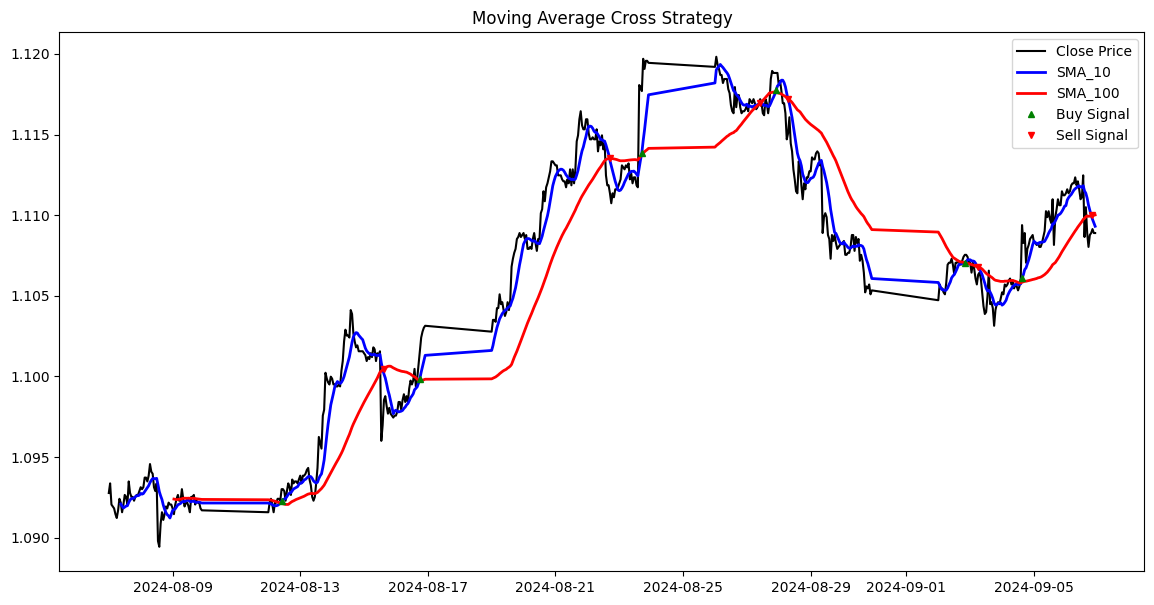

In [34]:
# Example visualization (optional)
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['SMA_10'], label=f'SMA_10', color='blue', linewidth=2)
plt.plot(data['SMA_100'], label=f'SMA_100', color='red', linewidth=2)

# Plot buy and sell signals
plt.plot(data[data['Signal'] == 1].index, data['SMA_10'][data['Signal'] == 1], '^', markersize=5, color='g', label='Buy Signal')
plt.plot(data[data['Signal'] == -1].index, data['SMA_100'][data['Signal'] == -1], 'v', markersize=5, color='r', label='Sell Signal')

plt.title('Moving Average Cross Strategy')
plt.legend()
plt.show()
